# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [2]:
# Replace None with your code
# Imports
import pandas as pd
import sqlite3

# Create connection to database
conn = sqlite3.connect('data.sqlite')

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [28]:
# Replace None with your code

pd.read_sql("""SELECT customerName, addressLine1, city, state, creditLimit, salesRepEmployeeNumber
            FROM customers
                WHERE state = 'CA' AND creditLimit >= 25000
                ORDER BY salesRepEmployeeNumber, creditLimit DESC
;""", conn)

,customerName,addressLine1,city,state,creditLimit,salesRepEmployeeNumber
0,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,210500,1165
1,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,105000,1165
2,Technics Stores Inc.,9408 Furth Circle,Burlingame,CA,84600,1165
3,The Sharp Gifts Warehouse,3086 Ingle Ln.,San Jose,CA,77600,1165
4,Mini Wheels Co.,5557 North Pendale Street,San Francisco,CA,64600,1165
5,Signal Collectibles Ltd.,2793 Furth Circle,Brisbane,CA,60300,1165
6,Collectable Mini Designs Co.,361 Furth Circle,San Diego,CA,105000,1166
7,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90700,1166
8,"Men 'R' US Retailers, Ltd.",6047 Douglas Av.,Los Angeles,CA,57700,1166
9,West Coast Collectables Co.,3675 Furth Circle,Burbank,CA,55400,1166


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [31]:
# Replace None with your code

pd.read_sql("""
            SELECT customerName, country
              FROM customers
              WHERE customerName LIKE '%Collect%' and country != 'USA'
;""", conn)

,customerName,country
0,"Australian Collectors, Co.",Australia
1,"Clover Collections, Co.",Ireland
2,"UK Collectables, Ltd.",UK
3,"King Kong Collectables, Co.",Hong Kong
4,Heintze Collectables,Denmark
5,"Royal Canadian Collectables, Ltd.",Canada
6,BG&E Collectables,Switzerland
7,Reims Collectables,France
8,Precious Collectables,Switzerland
9,Salzburg Collectables,Austria


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## My Response
I am using filters to make sure we only select the customers the international sale team asked for. First, I check that the customer's name contains the word "Collect", so it's aligned with our stretegy and second, I make sure the customer is not based in the United States, since this campaign is only for international partners. Both conditions together ensure the marketing campaign only targets the right potentila partners.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [44]:
# Replace None with your code
df = pd.read_sql("""
            SELECT country, c.state, AVG(creditLimit) AS avg_credit_lim
            FROM customers AS c              
            WHERE c.country = 'USA'
            GROUP by c.state
            ORDER BY avg_credit_lim DESC
;""", conn)

df

,country,state,avg_credit_lim
0,USA,NH,114200.000000
1,USA,NY,89966.666667
2,USA,PA,84766.666667
3,USA,CA,83854.545455
4,USA,NV,71800.000000
5,USA,MA,70755.555556
6,USA,CT,57350.000000
7,USA,NJ,43000.000000


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Adjust credit limits for new customers based on the state average:
New credit customers shoudl come with their state average as credit_limit 

New Hampshire (NH): Avg = $114,200 → State with higher initial limits
New Jersey (NJ): Avg = $43,000 → State more conservative limit

Identify States:
NH, NY, PA, CA all show average credit limits above $80,000. Too conservative. Focus promotional campaigns and potentially leading to larger orders.
NJ ($43,000) and CT ($57,350) have significantly lower averages. Develop strategies to increase sales in states with lower average credit limits.

Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

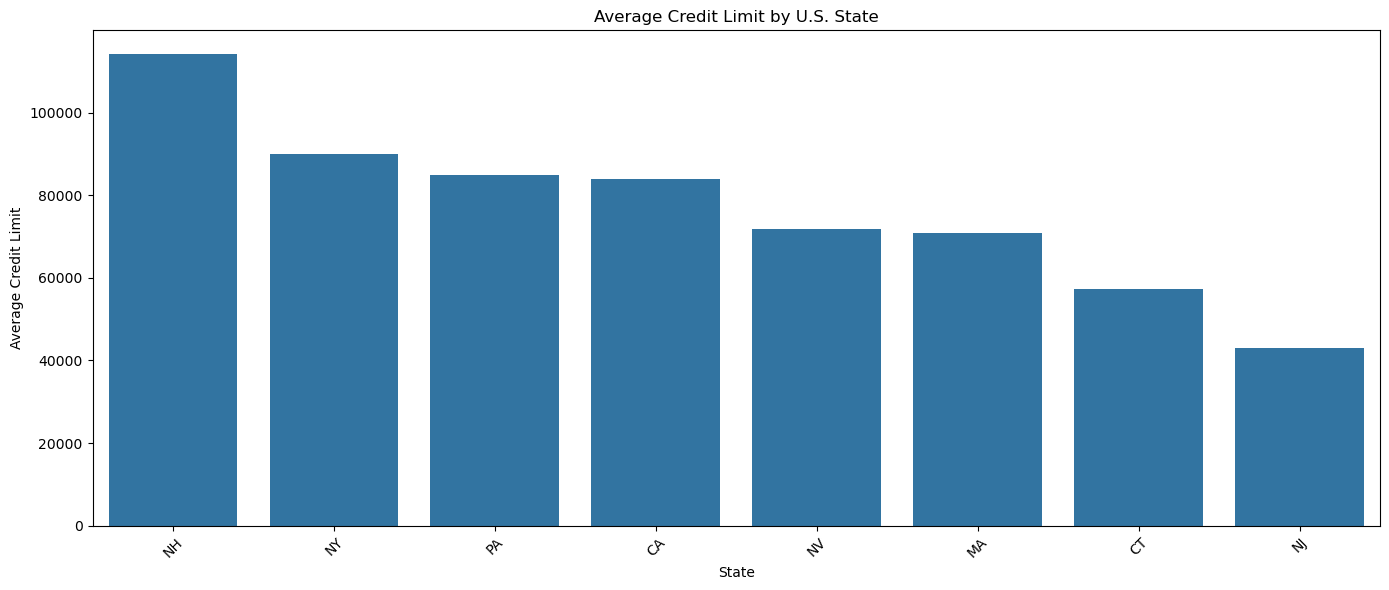

In [45]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(x='state', y='avg_credit_lim', data=df)
plt.title('Average Credit Limit by U.S. State')
plt.xlabel('State')
plt.ylabel('Average Credit Limit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [52]:
# Replace None with your code
df_5 = pd.read_sql("""
            SELECT customerName, SUM(amount) as tot_payment
            FROM customers              
            JOIN payments
                USING(customerNumber)
            GROUP by customerName
            ORDER BY tot_payment DESC
            LIMIT 10
;""", conn)
df_5

,customerName,tot_payment
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

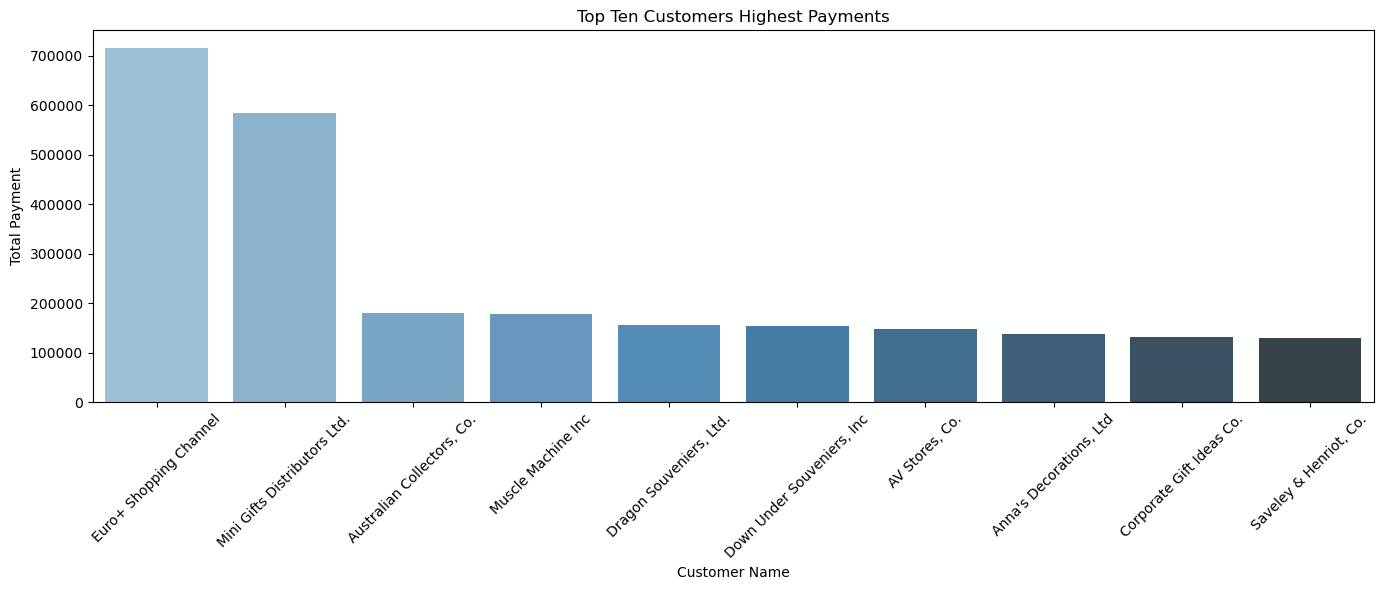

In [56]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments

plt.figure(figsize=(14, 6))
sns.barplot(x='customerName', y='tot_payment', data=df_5, palette='Blues_d', hue='customerName')
plt.title('Top Ten Customers Highest Payments')
plt.xlabel('Customer Name')
plt.ylabel('Total Payment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [71]:
# Replace None with you code
df_6 = pd.read_sql("""
            SELECT customerName, 
                   productName, 
                   SUM(quantityOrdered) AS quantity,
                   SUM(quantityOrdered * priceEach) AS tot_spent
            FROM customers
            JOIN orders
                USING(customerNumber)
            JOIN orderdetails
                USING(orderNumber)            
            JOIN products              
                USING(productCode)
            GROUP by customerName, productName
            HAVING tot_spent >= 10
            ORDER BY quantity DESC
;""", conn)
df_6

,customerName,productName,quantity,tot_spent
0,Euro+ Shopping Channel,1992 Ferrari 360 Spider red,308,46991.96
1,Euro+ Shopping Channel,1958 Chevy Corvette Limited Edition,245,8187.69
2,Euro+ Shopping Channel,1970 Dodge Coronet,197,10123.52
3,Euro+ Shopping Channel,1957 Chevy Pickup,183,18716.37
4,Euro+ Shopping Channel,2002 Chevy Corvette,174,16486.36
...,...,...,...,...
2527,La Rochelle Gifts,1954 Greyhound Scenicruiser,11,553.52
2528,Tekni Collectables Inc.,American Airlines: B767-300,11,854.04
2529,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,10,662.90
2530,Petit Auto,1913 Ford Model T Speedster,10,891.50


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [82]:
# Replace None with your code
df_7 = pd.read_sql("""
            SELECT productLine, 
                   COUNT(DISTINCT productCode) AS product_per_line,
                   COUNT(DISTINCT orderNumber) AS num_orders,
                   SUM(quantityOrdered) AS quantity,
                   SUM(quantityInStock) AS stock_per_line,
                   SUM(quantityInStock) / SUM(quantityOrdered) AS overstock_ratio,
                   COUNT(DISTINCT orderNumber) / COUNT(DISTINCT productCode) AS order_per_productLine
            FROM products
            JOIN orderdetails
                USING(productCode)            
            GROUP by productLine            
            ORDER BY product_per_line DESC
;""", conn)
df_7

,productLine,product_per_line,num_orders,quantity,stock_per_line,overstock_ratio,order_per_productLine
0,Classic Cars,37,209,35582,5844033,164,5
1,Vintage Cars,24,187,22933,3439570,149,7
2,Motorcycles,13,79,12778,1915517,149,6
3,Planes,12,66,11872,1744036,146,5
4,Trucks and Buses,11,75,11001,1003828,91,6
5,Ships,9,68,8532,732251,85,7
6,Trains,3,47,2818,450792,159,15


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

# My Thoughts

##### Compare if lines with more products necessarily lead to more orders
More products in a line doesn’t necessarily lead to more orders — or even more total demand.
Planes (12 products) performs almost on par with Motorcycles (13 products) and Trucks/Buses (11) in terms of quantity.
It's not the number of products — it's which products and how often they're ordered in bulk.

##### Identify potential overstocking in lines with low order quantities
There is a risk of Over_stock in Trains because the ratio is high (2nd highest) ad it's the least quantities sold

##### Ensure adequate variety in high-performing product lines
Considering there is not a hugh distortion in product_per_line and quantity, I wouldn't be worried abouth this. If we want to be more risky, maybe Train could be an opportunity for expansion of the line since the quantity is the lowest

##### Focus promotional efforts on product lines with high potential (many products but lower order quantities)
There is potential opportunity for boosting the promotion budget in Plans and Cars because the ratio vs orders is the lowest, so it might be some of the products in the line are not weel known

#### Advise Product development
Trains: Extremely high order-per-product ratio → Customers love what little you offer.
Consider expanding product variety here.

Planes & Classic Cars: Lots of products, but each product gets fewer orders.
Target promotions to boost awareness and cross-sell within the line.

Balanced performers: Ships, Trucks/Buses, Motorcycles, Vintage Cars.
These are healthy, but may still benefit from targeted upselling or optimizing inventory.

According to the ScatterPlot, there is a statistical trend, more variety of prodcuts implies more orders

Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

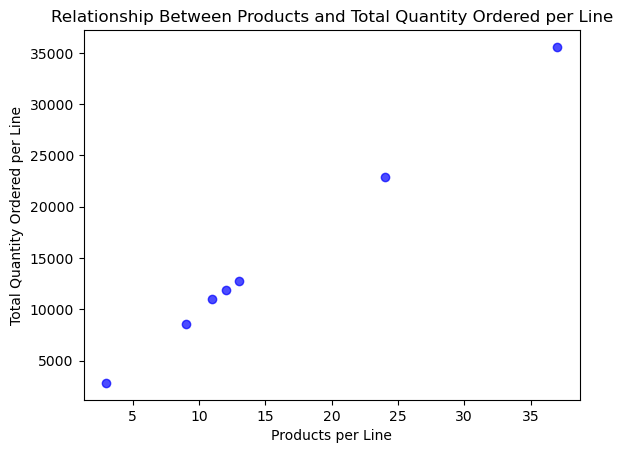

In [86]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered

plt.scatter(df_7['product_per_line'], df_7['quantity'], c='blue', alpha=0.7) # c is color and alpha is transparency 

plt.xlabel('Products per Line') 
plt.ylabel('Total Quantity Ordered per Line') 
plt.title('Relationship Between Products and Total Quantity Ordered per Line')
plt.show()

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

## I chose a scatter plot because it is one of the most effective ways to visually explore the relationship between two variables. This type of chart makes it easy to see whether a pattern or trend exists — in this case, between the number of products in a product line and the total quantity ordered. The scatter plot helps us evaluate whether offering a greater variety of products might lead to increased customer demand. By plotting these two variables, we can begin to understand if expanding product lines has the potential to positively influence order volume. This visual is useful for making strategic decisions, as it highlights whether a controllable factor (like product variety) could impact a desired outcome (like total orders), assuming other conditions remain stable.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [100]:
# Replace None with your code

df_9a = pd.read_sql("""
SELECT 
    e.firstName || ' ' || e.lastName AS full_name,
    e.jobTitle,
    e.reportsTo,
    o.city,
    e.officeCode,
    office_stats.num_employee_per_office
FROM employees e
JOIN offices o ON e.officeCode = o.officeCode
JOIN (
    SELECT officeCode, COUNT(*) AS num_employee_per_office
    FROM employees
    GROUP BY officeCode
    ) AS office_stats ON e.officeCode = office_stats.officeCode
WHERE num_employee_per_office < 5
ORDER BY o.city, e.officeCode;
""", conn)

df_9a

,full_name,jobTitle,reportsTo,city,officeCode,num_employee_per_office
0,Julie Firrelli,Sales Rep,1143,Boston,2,2
1,Steve Patterson,Sales Rep,1143,Boston,2,2
2,Larry Bott,Sales Rep,1102,London,7,2
3,Barry Jones,Sales Rep,1102,London,7,2
4,Foon Yue Tseng,Sales Rep,1143,NYC,3,2
5,George Vanauf,Sales Rep,1143,NYC,3,2
6,Andy Fixter,Sales Rep,1088,Sydney,6,4
7,Tom King,Sales Rep,1088,Sydney,6,4
8,Peter Marsh,Sales Rep,1088,Sydney,6,4
9,William Patterson,Sales Manager (APAC),1056,Sydney,6,4


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

## After a lot of pain trying to figure out the best way, it looks creating a subquery calculating a new aggregated column with the TOTAL employees per office give me the easy path understanding what happened. After that, just filtering that column by < 5 is straight forward

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [104]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [118]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [192]:
# Begin your code here
# Without the LIMIT, the query collapses
# Known_for connects every director with movies

pd.read_sql("""SELECT *
             FROM movie_basics
             LIMIT 5
;""", conn4)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [209]:

pd.read_sql("""SELECT *
             FROM directors
             LIMIT 5
;""", conn4)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [211]:

pd.read_sql("""SELECT *
             FROM persons
             LIMIT 5
;""", conn4)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


In [193]:
pd.read_sql("""SELECT * 
             FROM movie_ratings
             LIMIT 5
;""", conn4)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

# Part I

I want o create a line chart to se how every movie genre has evolved each year in rating.

#### Assumptions
I will consider only movies with more than 25000+ votes

I will consider Genre Combinations, example Action,Comedy = 1 genre

Eliminate 2019 because it looks imcomplete year

## STEP #1

Select num of votes to consider the movie relevant for the analyis

In [194]:
# First at all, everything good with the data

pd.read_sql("PRAGMA table_info(movie_ratings);", conn4)

,cid,name,type,notnull,dflt_value,pk
0,0,movie_id,TEXT,0,None,0
1,1,averagerating,REAL,0,None,0
2,2,numvotes,INTEGER,0,None,0


In [195]:
### How many movies are in total in the rating?

pd.read_sql("""SELECT COUNT(*) 
FROM movie_ratings 
;""", conn4)

,COUNT(*)
0,73856


In [196]:
### How many movies are with more than 10.000 votes in the rating?

pd.read_sql("""SELECT COUNT(*) 
FROM movie_ratings 
WHERE numvotes >= 10000
;""", conn4)

,COUNT(*)
0,2678


In [197]:
### How many movies are with more than 20.000 votes in the rating?

pd.read_sql("""SELECT COUNT(*) 
FROM movie_ratings 
WHERE numvotes >= 20000
;""", conn4)

,COUNT(*)
0,1815


In [198]:
### I want to see the top 20 movies after filtering for 20000+ votes
### I know some of the movies, so I feel confortable to use this sample for my study
### I would like to repeat the study with different sizes of the sample but we don't

pd.read_sql("""SELECT primary_title, start_year, genres, numvotes, averagerating
                FROM movie_basics
                JOIN movie_ratings 
                    USING(movie_id)                    
                WHERE numvotes >= 20000
                ORDER BY numvotes ASC
                LIMIT 10
;""", conn4)

,primary_title,start_year,genres,numvotes,averagerating
0,After the Dark,2013,"Drama,Fantasy,Sci-Fi",20001,5.8
1,Dumplin',2018,"Comedy,Drama,Musical",20032,6.7
2,Spy Kids 4-D: All the Time in the World,2011,"Action,Adventure,Comedy",20043,3.5
3,The Woman,2011,Horror,20046,6.0
4,The Trip,2010,"Comedy,Drama",20080,7.0
5,Afflicted,2013,"Horror,Mystery,Thriller",20091,6.3
6,Zero,2018,"Comedy,Drama,Romance",20097,5.7
7,Super Troopers 2,2018,"Comedy,Crime,Mystery",20104,6.1
8,Bad Santa 2,2016,"Comedy,Crime,Drama",20146,5.6
9,Passion,2012,"Drama,Mystery,Thriller",20153,5.3


In [199]:
# Create df

df_ib = pd.read_sql("""SELECT primary_title, start_year, genres, numvotes, averagerating, runtime_minutes
                FROM movie_basics
                JOIN movie_ratings 
                    USING(movie_id)                    
                WHERE numvotes >= 20000 AND start_year BETWEEN 2010 AND 2018
                ORDER BY numvotes ASC        
;""", conn4)

# Step #2

I would like to see how many times is word is repeated in my column genres

Assuming, there is not a single word repeated in the same row (We should check that)

### At the end I didn't use this step because I decided to use the genre combination

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
it is too complicated and I don't have that much time, so I am going to use single words genres

In [200]:
# Create df

df_ib_all = pd.read_sql("""SELECT primary_title, start_year, genres, numvotes, averagerating, runtime_minutes
                FROM movie_basics
                JOIN movie_ratings 
                    USING(movie_id)                    
                WHERE start_year BETWEEN 2010 AND 2018
                ORDER BY numvotes ASC        
;""", conn4)

In [201]:
from collections import Counter

# Clean my DataFrame Split and flatten the genres
# all_genres = df_genres['genres'].str.split(',').explode().str.strip() if we want to check for spaces but there are not
all_genres = df_ib_all['genres'].str.split(',').explode()

# Count frequency
genre_counts = Counter(all_genres)

# Get top 10 genres
top_genres = genre_counts.most_common(10)

# Display as DataFrame
top_genres = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
top_genres

,Genre,Count
0,Drama,29888
1,Documentary,17352
2,Comedy,16737
3,Thriller,7956
4,Horror,7470
5,Action,6784
6,Romance,6421
7,Crime,4486
8,Biography,3726
9,Adventure,3710


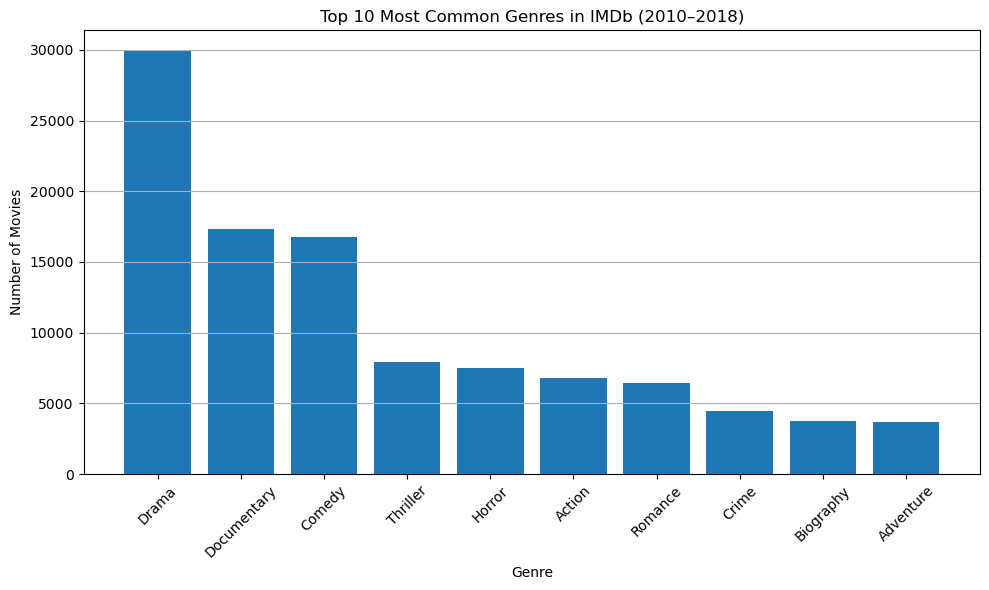

In [202]:
plt.figure(figsize=(10, 6))
plt.bar(top_genres['Genre'], top_genres['Count'])

plt.title("Top 10 Most Common Genres in IMDb (2010–2018)")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Step 3

The idea is: We add two columns to top_genres:

when the word is there

1. Total number of votes _sum 

2. Average rating


In [203]:
# Trying with subquery

pd.read_sql("""SELECT start_year, genres, numvotes, averagerating, movie_genre_stats.num_movies_per_genre
                FROM movie_basics b
                JOIN movie_ratings r 
                    USING(movie_id)                    
                JOIN (SELECT 
                        movie_id, 
                        COUNT(*) AS num_movies_per_genre
                    FROM movie_basics
                    GROUP BY genres    
                    ) AS movie_genre_stats ON b.movie_id = movie_genre_stats.movie_id                
                GROUP BY genres
                ORDER BY movie_genre_stats.num_movies_per_genre DESC
                LIMIT 10
                
;""", conn4)

,start_year,genres,numvotes,averagerating,num_movies_per_genre
0,2013,Documentary,53,7.6,32185
1,2018,Drama,4517,6.9,21486
2,2017,Horror,2420,5.6,4372
3,2018,"Comedy,Drama",13,6.1,3519
4,2012,Thriller,1053,6.6,3046
5,2016,Action,16,6.4,2219
6,2018,"Comedy,Drama,Romance",6287,6.4,1558
7,2011,"Documentary,Drama",748,6.8,1554
8,2013,"Comedy,Romance",77,6.4,1507
9,2015,Romance,15,6.1,1454


# Step 4

Creat a df with Total num of votes, and average rating for gender combination

In [204]:
# Trying without subquery

my_df = pd.read_sql("""
SELECT 
    b.start_year,
    b.genres,
    COUNT(*) AS num_movies_per_genre,
    SUM(r.numvotes) AS total_votes,
    AVG(r.averagerating) AS avg_rating
FROM movie_basics b
JOIN movie_ratings r 
    USING(movie_id)
WHERE b.genres IS NOT NULL 
GROUP BY b.start_year, b.genres
HAVING SUM(r.numvotes) >= 25000
ORDER BY r.numvotes, b.start_year, total_votes ASC
;""", conn4)

my_df

,start_year,genres,num_movies_per_genre,total_votes,avg_rating
0,2014,"Biography,Documentary",116,32918,7.340517
1,2016,Documentary,1450,223373,7.384069
2,2018,"Drama,Mystery",25,31085,6.380000
3,2018,"Action,Drama",48,131427,6.204167
4,2018,"Biography,Drama",37,175522,6.762162
...,...,...,...,...,...
932,2011,"Adventure,Drama,Fantasy",7,900498,5.942857
933,2013,"Drama,Sci-Fi,Thriller",16,726396,5.768750
934,2012,"Adventure,Family,Fantasy",5,735677,5.960000
935,2012,"Drama,Western",5,1212438,6.280000


# Select 7 gender to plot

In [205]:
# Most frequent genre combinations

top_genres = (
    my_df[(my_df['start_year'] >= 2010) & (my_df['start_year'] <= 2019)]
    ['genres']
    .value_counts()
    .head(7)
    .index
    .tolist()
)

top_genres

['Drama',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Animation',
 'Action,Adventure,Sci-Fi',
 'Biography,Crime,Drama',
 'Horror,Thriller',
 'Comedy,Romance']

In [206]:
# Highest total votes by genre combination

top_genres2 = (
    my_df[(my_df['start_year'] >= 2010) & (my_df['start_year'] <= 2018)]
    .groupby('genres')['total_votes']
    .sum()
    .sort_values(ascending=False)
    .head(7)
    .index
    .tolist()
)

top_genres2

['Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Adventure,Animation,Comedy',
 'Drama',
 'Comedy,Drama,Romance',
 'Action,Adventure,Comedy',
 'Comedy']

In [207]:
# Clean to plot Most frequent genre combinations

df_plot = my_df[
    (my_df['start_year'].between(2010, 2018)) &
    (my_df['genres'].isin(top_genres))]
df_plot = df_plot.sort_values(by=['genres', 'start_year'])
df_plot

,start_year,genres,num_movies_per_genre,total_votes,avg_rating
927,2010,"Action,Adventure,Animation",11,691358,6.372727
791,2011,"Action,Adventure,Animation",15,571142,6.260000
803,2012,"Action,Adventure,Animation",21,181422,6.633333
829,2013,"Action,Adventure,Animation",9,211759,6.911111
880,2014,"Action,Adventure,Animation",18,970013,6.655556
...,...,...,...,...,...
286,2014,"Horror,Thriller",127,201916,4.943307
652,2015,"Horror,Thriller",124,240426,4.683871
16,2016,"Horror,Thriller",110,695135,4.699091
120,2017,"Horror,Thriller",114,457082,4.798246


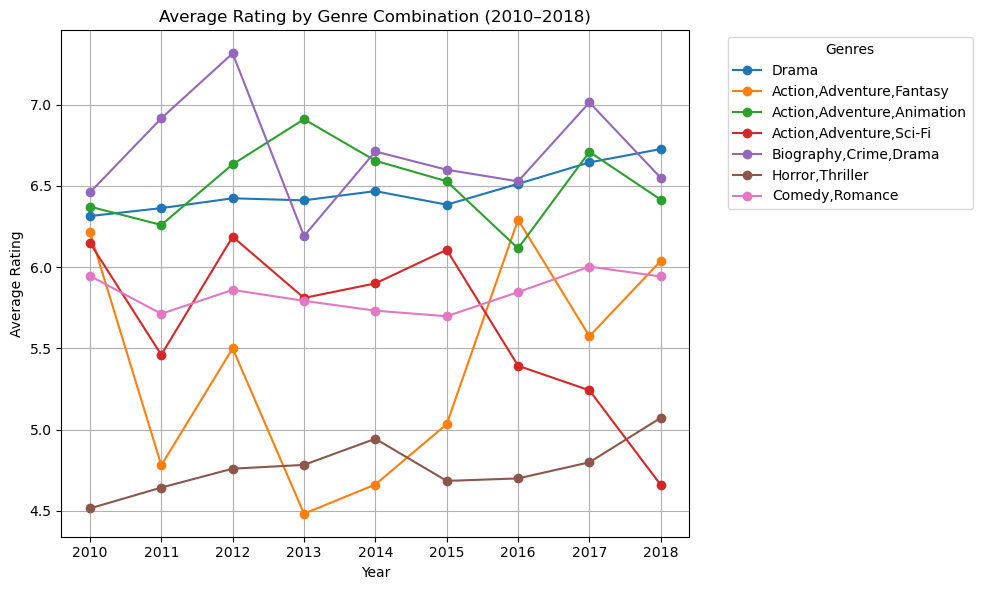

In [208]:
import matplotlib.pyplot as plt

# Plot Most frequent genre combinations

plt.figure(figsize=(10, 6))

for genre in top_genres:
    subset = df_plot[df_plot['genres'] == genre]
    plt.plot(subset['start_year'], subset['avg_rating'], marker='o', label=genre)

plt.title("Average Rating by Genre Combination (2010–2018)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Initial exploration

In [135]:
df_ib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  1815 non-null   object 
 1   start_year     1815 non-null   int64  
 2   genres         1815 non-null   object 
 3   numvotes       1815 non-null   int64  
 4   averagerating  1815 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 71.0+ KB


In [169]:
# Let's Calculate the # of movies per year
# I am not interested in the movies of the future 2019+

df_intro = pd.read_sql("""SELECT 
        start_year,
        COUNT(*) AS num_movies,
        AVG(CASE 
            WHEN runtime_minutes >= 60 AND runtime_minutes <= 240 
            THEN runtime_minutes END) AS avg_run_time       
    FROM movie_basics
    WHERE start_year <= 2018
    GROUP BY start_year
    ORDER BY start_year DESC
;""", conn4)

df_intro

,start_year,num_movies,avg_run_time
0,2018,16849,94.696125
1,2017,17504,93.862325
2,2016,17272,93.322439
3,2015,16243,92.840869
4,2014,15589,92.732584
5,2013,14709,92.369567
6,2012,13787,92.058855
7,2011,12900,92.251298
8,2010,11849,92.380216


In [170]:
# Average movies per year

df_intro['num_movies'].mean()

15189.111111111111

In [171]:
df_intro['avg_run_time'].mean()

92.9460309714777

In [172]:
df_ib.tail()

,primary_title,start_year,genres,numvotes,averagerating,runtime_minutes
1810,The Avengers,2012,"Action,Adventure,Sci-Fi",1183655,8.1,143.0
1811,Django Unchained,2012,"Drama,Western",1211405,8.4,165.0
1812,Interstellar,2014,"Adventure,Drama,Sci-Fi",1299334,8.6,169.0
1813,The Dark Knight Rises,2012,"Action,Thriller",1387769,8.4,164.0
1814,Inception,2010,"Action,Adventure,Sci-Fi",1841066,8.8,148.0


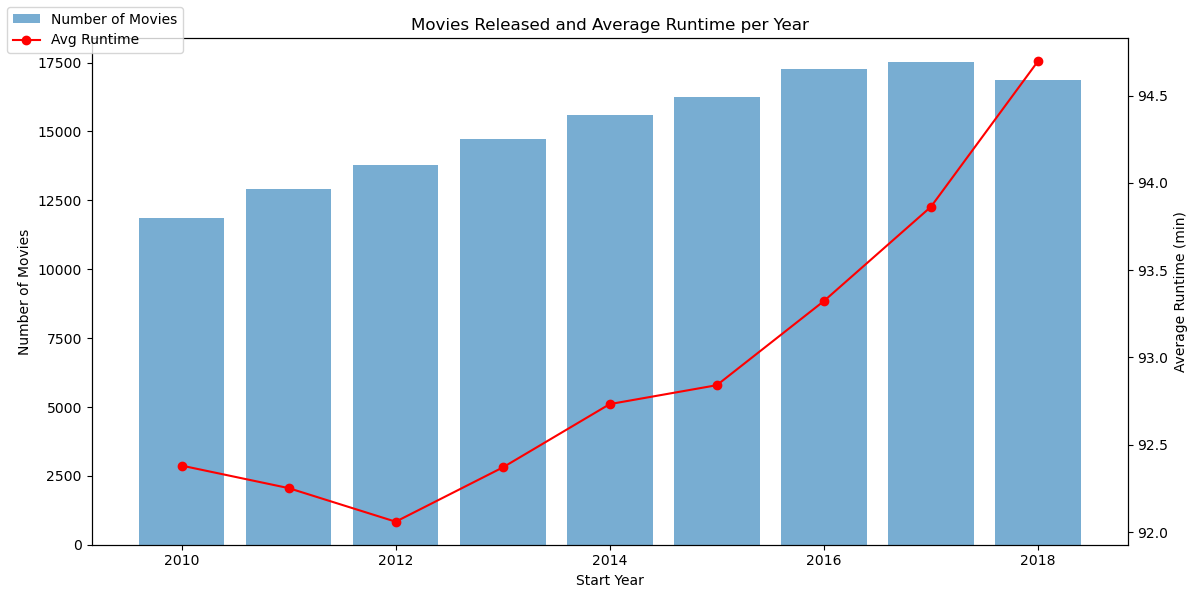

In [173]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.bar(df_intro["start_year"], df_intro["num_movies"], alpha=0.6, label="Number of Movies")
ax2.plot(df_intro["start_year"], df_intro["avg_run_time"], color="red", marker='o', label="Avg Runtime")

fig.legend(loc="upper left")
ax1.set_title("Movies Released and Average Runtime per Year")
ax1.set_xlabel("Start Year")
ax1.set_ylabel("Number of Movies")
ax2.set_ylabel("Average Runtime (min)")

plt.tight_layout()
plt.show()


# Top Directors

Top ten directors with more movies

In [216]:
df_dir = pd.read_sql("""SELECT 
                    primary_title, 
                    start_year, 
                    genres, 
                    numvotes,
                    averagerating, 
                    primary_name AS Director
                FROM movie_basics
                JOIN movie_ratings 
                    USING(movie_id)
                JOIN directors
                    USING(movie_id)
                JOIN persons
                    USING(person_id)
                ORDER BY numvotes ASC
                LIMIT 10
;""", conn4)

df_dir 

,primary_title,start_year,genres,numvotes,averagerating,Director
0,To Chase a Million,2018,"Action,Drama",5,7.4,Pat Jackson
1,Ivan Mosjoukine ou L'enfant du carnaval,2016,Documentary,5,9.0,Galina Dolmatovskaia
2,Ivan Mosjoukine ou L'enfant du carnaval,2016,Documentary,5,9.0,Galina Dolmatovskaia
3,Meu Nome é Daniel,2018,Documentary,5,8.0,Daniel Gonçalves
4,Meu Nome é Daniel,2018,Documentary,5,8.0,Daniel Gonçalves
5,Meu Nome é Daniel,2018,Documentary,5,8.0,Daniel Gonçalves
6,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary,5,7.0,Marc Jampolsky
7,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary,5,7.0,Marc Jampolsky
8,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary,5,7.0,Marc Jampolsky
9,Versailles Rediscovered - The Sun King's Vanis...,2019,Documentary,5,7.0,Marc Jampolsky


In [232]:
df_dir2 = pd.read_sql("""SELECT 
                    primary_name AS Director, 
                    COUNT(DISTINCT genres) AS num_genres_combined, 
                    SUM(numvotes) AS total_votes,
                    AVG(averagerating) AS avg_rating                     
                FROM movie_basics
                JOIN movie_ratings 
                    USING(movie_id)
                JOIN directors
                    USING(movie_id)
                JOIN persons
                    USING(person_id)
                WHERE start_year BETWEEN 2010 AND 2018
                    AND numvotes >= 25000
                GROUP BY Director
                HAVING COUNT(*) >=3
                ORDER BY total_votes DESC
                LIMIT 10
;""", conn4)

df_dir2 

,Director,num_genres_combined,total_votes,avg_rating
0,James Gunn,3,18640459,6.266667
1,Joe Russo,1,16215918,8.136000
2,Anthony Russo,1,16215918,8.136000
3,Zack Snyder,3,10576977,6.619231
4,Christopher Nolan,4,10457390,8.437500
5,Matthew Vaughn,3,9962120,7.500000
6,Peter Jackson,2,8619065,7.700000
7,Phil Lord,2,6565719,7.421053
8,Christopher Miller,2,6565719,7.421053
9,Kenneth Branagh,4,6453641,6.760000


In [230]:
df_dir3 = pd.read_sql("""SELECT 
                    primary_name AS Director, 
                    COUNT(movie_id) AS num_movies                    
                FROM movie_basics
                JOIN movie_ratings 
                    USING(movie_id)
                JOIN directors
                    USING(movie_id)
                JOIN persons
                    USING(person_id)
                WHERE start_year BETWEEN 2010 AND 2018
                    AND numvotes >= 25000
                GROUP BY Director
                ORDER BY num_movies DESC
                LIMIT 12
;""", conn4)

df_dir3 

,Director,num_movies
0,James Gunn,45
1,Peter Farrelly,36
2,Jeff Tremaine,30
3,Brett Ratner,28
4,Zack Snyder,26
5,Adam Wingard,26
6,Joe Russo,25
7,Anthony Russo,25
8,Steven Brill,23
9,Rich Moore,23


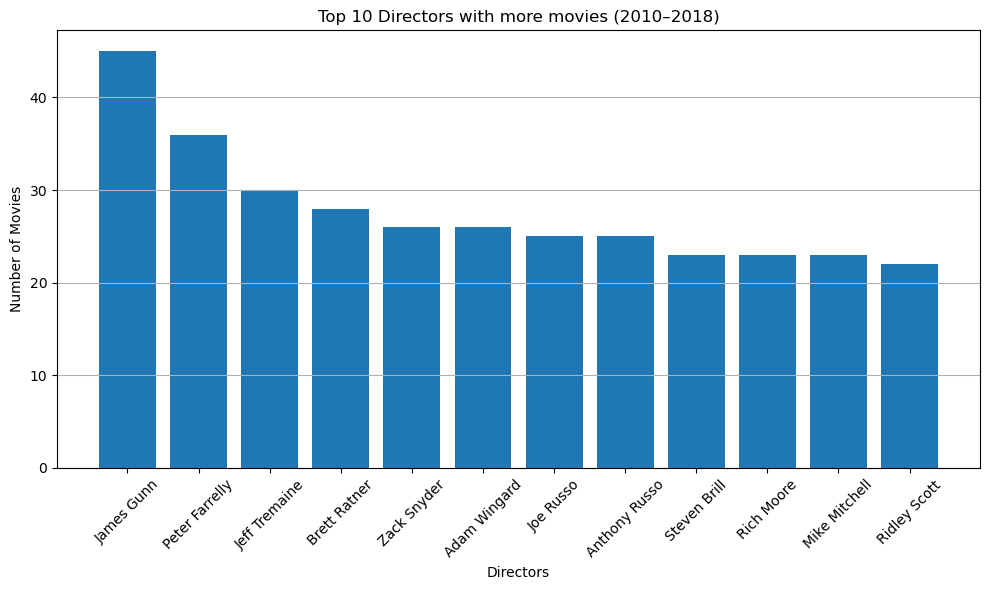

In [231]:
plt.figure(figsize=(10, 6))
plt.bar(df_dir3['Director'], df_dir3['num_movies'])

plt.title("Top 10 Directors with more movies (2010–2018)")
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()